<a href="https://colab.research.google.com/github/nv-hiep/dust_MBB_fit/blob/main/MCMC_MBB_Fit_GOALS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modified BlackBody Fit - GOALS Dataset**

# 1. Mount the google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Root directory

In [3]:
cd '/content/gdrive/My Drive/Colab Notebooks/dustSED'

/content/gdrive/My Drive/Colab Notebooks/dustSED


# 3. Import Libraries



In [4]:
"""
MBB spectrum fitting with MCMC
"""

import os
import scipy, math
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from libs import constants, utils

plt.style.use('fivethirtyeight')

%matplotlib inline  

In [5]:
!pip3 install uncertainties

     |████████████████████████████████| 256kB 5.9MB/s 


In [6]:
#-------- MAIN --------#
'''
 n_sample : number of samples to take
 chains   : number of concurrent chains
 burn     : number of initial samples to burn
 thin     : multiple of samples to keep
'''
n_sample = 15000
chains   = 3
burn     = int(0.1*n_sample)
thin     = 5
chunk    = 250

# Path to the data 'df'
root_path = os.getcwd()
print(os.getcwd())
print(os.path.dirname(os.path.realpath('__file__')))

# Read data from csv
df = pd.read_csv(os.path.join(root_path, 'data', 'flux_measurements.csv')).set_index('Name')
df.head()

/content/gdrive/My Drive/Colab Notebooks/dustSED
/content/gdrive/My Drive/Colab Notebooks/dustSED


,RA,Dec,D,z,Origin,F60,F70,F100,F160,F250,F350,F500,sigma60,sigma70,sigma100,sigma160,sigma250,sigma350,sigma500,L_IR
Name,,,,,,,,,,,,,,,,,,,,
F00073+2538,09:53.4,+25:55:27.7,1.953438e+24,0.01523,GOALS,NaN,10480.0,14260.0,11850.0,5311.0,2026.0,718.0,NaN,520.0,710.0,590.0,347.0,134.0,46.0,11.12
F00085-1223,11:06.6,-12:06:28.2,2.515090e+24,0.01962,GOALS,NaN,18210.0,17680.0,10650.0,3573.0,1239.0,339.0,NaN,840.0,810.0,480.0,214.0,75.0,21.0,11.49
F00163-1039,18:50.4,-10:22:05.3,3.437804e+24,0.02722,GOALS,NaN,8038.0,9876.0,7496.0,2862.0,1209.0,419.0,NaN,403.0,495.0,375.0,189.0,81.0,33.0,11.48
F00344-3349,36:52.5,-33:33:17.2,2.635444e+24,0.02060,GOALS,NaN,6195.0,5096.0,2341.0,639.0,216.0,67.0,NaN,276.0,228.0,101.0,38.0,14.0,6.0,11.28
F00402-2349,42:49.3,-23:33:04.3,2.817518e+24,0.02217,GOALS,NaN,14600.0,20000.0,16110.0,6397.0,2441.0,703.0,NaN,560.0,770.0,600.0,323.0,124.0,35.0,11.44


In [7]:
# Arrange data into a dict. for each data-source 
# [GOALS: 219 samples, Cortese: 241, PCCS: 17, H-ATLAS: 1706, HERUS: 42]
data_sets = {data_source: df[df['Origin'] == data_source] for data_source in df['Origin'].unique()}

log_text = '\n'.join([f'\t{data_source}: {len(data_set)}' for data_source, data_set in data_sets.items()])
print(f'Data of {len(df)} objects:\n{log_text}')
print(f'MCMC will take {n_sample} samples for each object in {chains} chain(s)')

Data of 2225 objects:
	GOALS: 219
	Cortese: 241
	PCCS: 17
	H-ATLAS: 1706
	HERUS: 42
MCMC will take 15000 samples for each object in 3 chain(s)


In [8]:
# Run PCCS only
source   = 'GOALS'
data_set = data_sets[source]
# results = {source: _run(data_set, n_sample, chains, burn, thin, chunk) for source, data_set in data_sets.items()}
results = { source: utils._run(data_set, n_sample, chains, burn, thin, chunk) }
results


Running MCMC for GOALS: chunk 1 of 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [mass, beta, temperature]
100%|██████████| 17000/17000 [34:03<00:00,  8.32it/s]


6 with p >= 0.95


{'GOALS':              temperature_mean  temperature_std  ...  mass_std  confidence
 Name                                            ...                      
 F00073+2538         30.520770         1.259919  ...  0.035215    0.797627
 F00085-1223         33.491860         1.384160  ...  0.033365    0.846167
 F00163-1039         33.319491         1.549678  ...  0.035554    0.762713
 F00344-3349         39.288422         2.048378  ...  0.033981    0.760792
 F00402-2349         28.453370         0.817354  ...  0.025779    0.904320
 ...                       ...              ...  ...       ...         ...
 F23394-0353         25.542123         0.803166  ...  0.030412    0.997521
 23436+5257          33.542607         1.392884  ...  0.031039    0.787484
 F23444+2911         27.207781         0.796976  ...  0.026952    0.947224
 F23488+1949         25.704953         1.633341  ...  0.060678    0.758256
 F23488+2018         32.445571         1.251328  ...  0.031724    0.816430
 
 [219 rows x 7

In [55]:
# Results for PCCS
res_pccs = results[source]
# res_pccs = res_pccs[ res_pccs['confidence'] > 0.95 ]
res_pccs

,temperature_mean,temperature_std,beta_mean,beta_std,mass_mean,mass_std,confidence
Name,,,,,,,
F00073+2538,30.520770,1.259919,1.568570,0.112777,7.783978,0.035215,0.797627
F00085-1223,33.491860,1.384160,1.984099,0.101723,7.685125,0.033365,0.846167
F00163-1039,33.319491,1.549678,1.521650,0.121977,7.958915,0.035554,0.762713
F00344-3349,39.288422,2.048378,1.981315,0.118735,6.876677,0.033981,0.760792
F00402-2349,28.453370,0.817354,1.942970,0.085617,8.199744,0.025779,0.904320
...,...,...,...,...,...,...,...
F23394-0353,25.542123,0.803166,1.376274,0.107028,7.651238,0.030412,0.997521
23436+5257,33.542607,1.392884,1.714799,0.109991,7.914037,0.031039,0.787484
F23444+2911,27.207781,0.796976,1.457428,0.096949,8.183846,0.026952,0.947224


In [56]:
res_pccs.index

Index(['F00073+2538', 'F00085-1223', 'F00163-1039', 'F00344-3349',
       'F00402-2349', 'F00506+7248', 'F00548+4331', 'F01053-1746',
       'F01076-1707', 'F01159-4443',
       ...
       '23262+0314', 'F23365+3604', 'F23394-0353', 'F23394-0353',
       'F23394-0353', 'F23394-0353', '23436+5257', 'F23444+2911',
       'F23488+1949', 'F23488+2018'],
      dtype='object', name='Name', length=219)

In [57]:
# Fitted parameters
temp = res_pccs['temperature_mean'].to_numpy()
beta = res_pccs['beta_mean'].to_numpy()
mass = res_pccs['mass_mean'].to_numpy()         # in fact, this is log-mass

In [58]:
# Take only the samples/rows of the PCCS results
data_set = data_set[ data_set.index.isin(res_pccs.index) ]
data_set

,RA,Dec,D,z,Origin,F60,F70,F100,F160,F250,F350,F500,sigma60,sigma70,sigma100,sigma160,sigma250,sigma350,sigma500,L_IR
Name,,,,,,,,,,,,,,,,,,,,
F02071-1023,09:31.8,-10:09:30.7,1.644838e+24,0.01285,GOALS,NaN,36900.0,44000.0,34540.0,14720.0,5799.0,1837.0,NaN,1040.0,1220.0,960.0,540.0,216.0,70.0,11.05
F03164+4119,19:48.2,+41:30:42.0,2.234264e+24,0.01756,GOALS,NaN,6807.0,7490.0,5691.0,3506.0,2851.0,2739.0,NaN,343.0,377.0,286.0,217.0,176.0,168.0,11.26
F13197-1627,22:21.7,-16:43:06.2,2.453370e+24,0.01654,GOALS,NaN,6179.0,6451.0,5199.0,2440.0,1016.0,330.0,NaN,238.0,234.0,174.0,108.0,47.0,17.0,11.28
F13564+3741,58:35.8,+37:26:20.5,1.768278e+24,0.01161,GOALS,NaN,12880.0,20720.0,22650.0,11930.0,5187.0,1856.0,NaN,440.0,700.0,810.0,780.0,338.0,122.0,11.08
F23394-0353,42:00.9,-03:36:54.4,2.851464e+24,0.02324,GOALS,NaN,6181.0,8292.0,6863.0,2932.0,1226.0,402.0,NaN,279.0,372.0,299.0,180.0,76.0,26.0,11.27
F23394-0353,42:00.9,-03:36:54.4,2.851464e+24,0.02324,GOALS,NaN,722.0,1422.0,1988.0,1328.0,555.0,178.0,NaN,31.0,56.0,82.0,87.0,38.0,14.0,11.27
F23394-0353,41:46.0,-03:39:42.3,2.851464e+24,0.02324,GOALS,NaN,6181.0,8292.0,6863.0,2932.0,1226.0,402.0,NaN,279.0,372.0,299.0,180.0,76.0,26.0,11.27
F23394-0353,41:46.0,-03:39:42.3,2.851464e+24,0.02324,GOALS,NaN,722.0,1422.0,1988.0,1328.0,555.0,178.0,NaN,31.0,56.0,82.0,87.0,38.0,14.0,11.27


In [59]:
# Save results
from os.path import join
filename = "-".join([source, str(n_sample), str(chains), str(burn), str(thin)])
# traces.to_csv(join(root_path, 'results', filename + '.csv'), mode='w+')

import pickle

with open(join(root_path, 'results', filename + '_ok_GOALS.pickle'), 'wb') as output_file:
  pickle.dump(results, output_file)


# results = pickle.load( open( join(root_path, 'results', filename + '_ok.pickle'), 'rb' ) )

In [60]:
# Infor of the dataset: wavelengths, frequencies and flux
obs         = utils.Obs(data_set)
nu          = obs.freq_
lambda_     = 1e6*obs.lambda_
flux, err   = obs.flux_
flux

,F70,F100,F160,F250,F350,F500
Name,,,,,,
F02071-1023,36900.0,44000.0,34540.0,14720.0,5799.0,1837.0
F03164+4119,6807.0,7490.0,5691.0,3506.0,2851.0,2739.0
F13197-1627,6179.0,6451.0,5199.0,2440.0,1016.0,330.0
F13564+3741,12880.0,20720.0,22650.0,11930.0,5187.0,1856.0
F23394-0353,6181.0,8292.0,6863.0,2932.0,1226.0,402.0
F23394-0353,722.0,1422.0,1988.0,1328.0,555.0,178.0
F23394-0353,6181.0,8292.0,6863.0,2932.0,1226.0,402.0
F23394-0353,722.0,1422.0,1988.0,1328.0,555.0,178.0


In [61]:
# For plotting: Frequency Values for the X-axis
lambda_grid = np.logspace(1.6, 3, 100)
nu_grid     = constants.c/(1.e-6*lambda_grid)

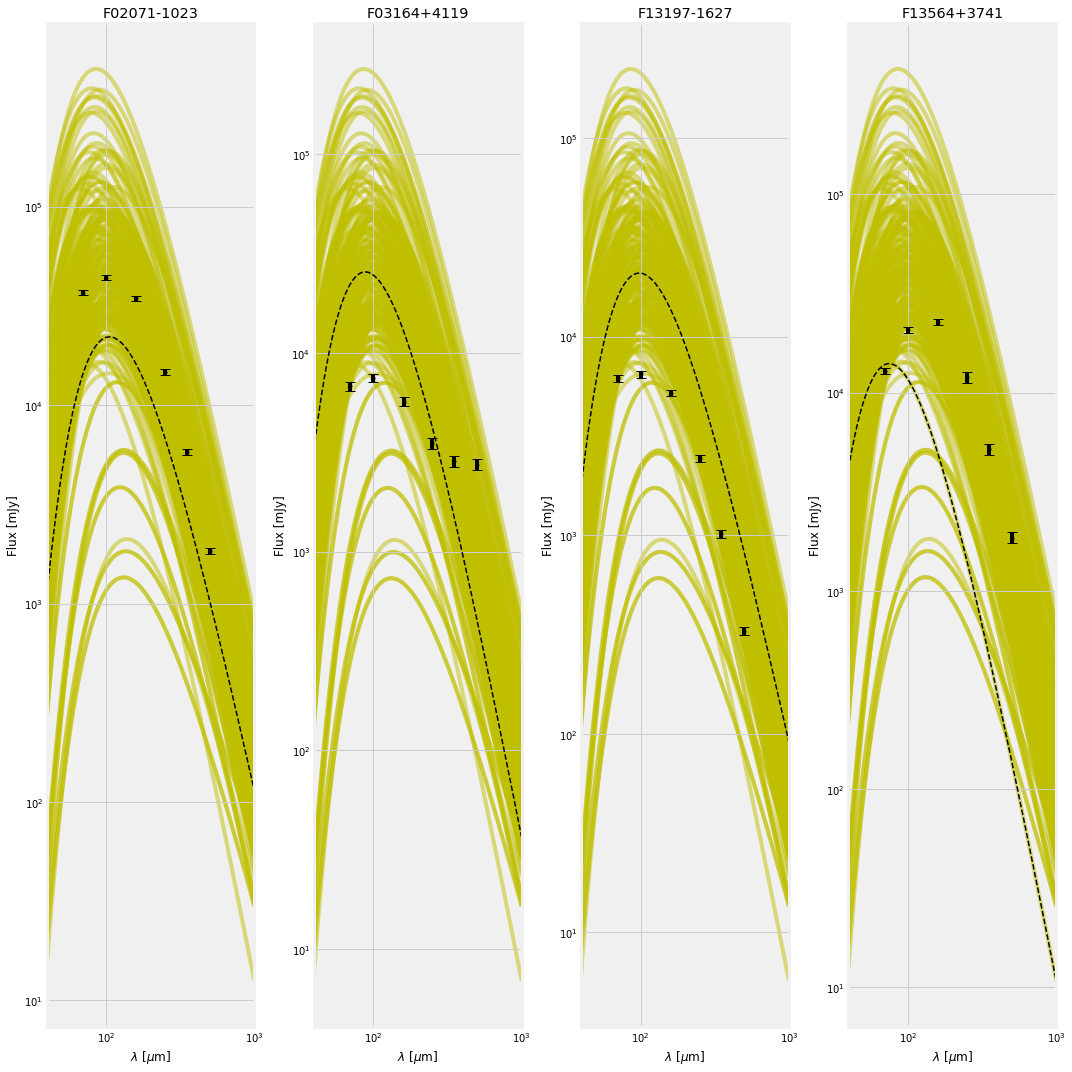

In [64]:
# For plotting
ncols     = 4
nrows     = len(data_set.index)//ncols if len(data_set.index)%ncols==0 else len(data_set.index)//ncols + 1
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 15))
axes      = axes.flatten()

# use iterrows() to make a generator
for id, data in data_set.reset_index().iterrows():
  if id > 3:
    break

  ax = axes[id]
  idx = data['Name']

  flux_predict = utils.MBB_model(nu_grid, temp[id], beta[id], mass[id], data['D'], data['z'])
  # trace_values = MBB_model(nu_grid, temp, beta, mass, data['D'], data['z'])[::5].T
  trace_values = utils.MBB_model(nu_grid, temp, beta, mass, data['D'], data['z']).T

  # plotting
  ax.plot(lambda_grid, trace_values, zorder=0, color='y', alpha=0.5)
  ax.errorbar(lambda_, flux.loc[idx], yerr=err.loc[idx], zorder=1, fmt='.', capsize=5, color='k')
  ax.plot(lambda_grid, flux_predict, linestyle='--', zorder=2, color='k', alpha=1., linewidth=1.5);

  # Decorate
  ax.set_ylabel('Flux [mJy]')
  ax.set_xlabel(r'$\lambda$ [$\mu$m]')
  ax.set_title(idx)
  ax.set_yscale('log')
  ax.set_xscale('log')
  ax.set_xlim(min(lambda_grid), max(lambda_grid))
# End - for

plt.tight_layout()
plt.show()